In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("poly.csv")

In [3]:
data.head()

,zaman,sicaklik
0,1,0
1,3,9
2,5,20
3,10,35
4,15,60


In [4]:
x=data.iloc[:,0].values.reshape(-1,1)
y=data.iloc[:,1].values.reshape(-1,1)

In [5]:
from sklearn.preprocessing import StandardScaler
scx=StandardScaler()
scy=StandardScaler()

In [6]:
x1=scx.fit_transform(x)
y1=scy.fit_transform(y).ravel()   #flattens the data

In [8]:
from sklearn.svm import SVR
sv=SVR(kernel="rbf",epsilon=0.1,C=1)    #linear, poly, rbf, you can use them all, but here we used it because rbf is the most efficient
sv.fit(x1,y1)

SVR(C=1)

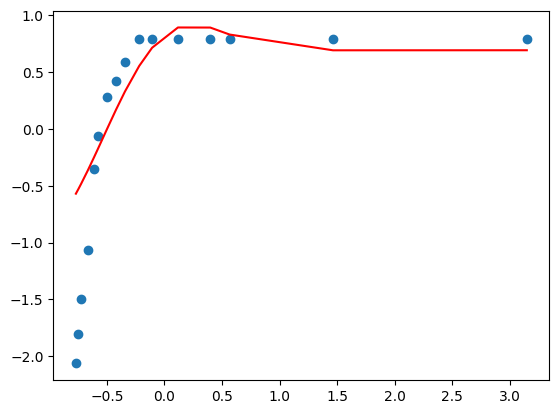

In [9]:
plt.scatter(x1,y1)
plt.plot(x1,sv.predict(x1),color="red")

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# Tahminleri yap
y_pred = sv.predict(x1)

# RMSE hesapla
rmse = np.sqrt(mean_squared_error(scy.inverse_transform(y1.reshape(-1, 1)), scy.inverse_transform(y_pred.reshape(-1, 1))))
print(f"RMSE: {rmse}")

# R-squared (R²) hesapla
r2 = r2_score(scy.inverse_transform(y1.reshape(-1, 1)), scy.inverse_transform(y_pred.reshape(-1, 1)))
print(f"R²: {r2}")

"""When calculating the RMSE, it is necessary to convert both the actual values (y1) and the predictions (y_pred) to the original scale
We use the sc_y.inverse_transform method. This is important because the scaling operation will reduce errors and therefore 
It may affect the RMSE value.
Likewise, when calculating the R² value, we convert the actual and predicted values to the original scale."""

RMSE: 20.90984698683856
R²: 0.6435753188868383


'When calculating the RMSE, it is necessary to convert both the actual values (y1) and the predictions (y_pred) to the original scale\nWe use the sc_y.inverse_transform method. This is important because the scaling operation will reduce errors and therefore \nIt may affect the RMSE value.\nLikewise, when calculating the R² value, we convert the actual and predicted values to the original scale.'

In [12]:
manual_value = np.array([[26]])
scaled_manual_value = scx.transform(manual_value)
manual_prediction = sv.predict(scaled_manual_value)
original_scale_manual_prediction = scy.inverse_transform(manual_prediction.reshape(-1, 1))

print(f"predicted value at 26th min: {original_scale_manual_prediction[0][0]}")


predicted value at 26th min: 73.01641113813511


In [13]:
y1

array([-2.06286535, -1.80589943, -1.49182996, -1.06355342, -0.34975918,
       -0.06424148,  0.27837975,  0.4211386 ,  0.59244922,  0.79231161,
        0.79231161,  0.79231161,  0.79231161,  0.79231161,  0.79231161,
        0.79231161])

In [14]:
scy.inverse_transform([[0.27837975]])   #rescale 

array([[81.99999988]])